# Import libraries

In [51]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load prediction file

In [52]:
with open("../exps/thumos/actionformer_i3d/result_detection.json", "r") as f:
  predictions = json.load(f)

In [53]:
rows_predictions = []
for video_id, segments in predictions['results'].items():
  for s in segments:
    rows_predictions.append({
      'video_id': video_id,
      'start': s['segment'][0],
      'end': s['segment'][1],
      'label': s['label'],
      'score': s['score']
    })
  
predictions_df = pd.DataFrame(rows_predictions)
predictions_df.head()

,video_id,start,end,label,score
0,video_validation_0000051,78.28,82.47,Billiards,0.4698
1,video_validation_0000051,131.47,139.93,Billiards,0.4571
2,video_validation_0000051,63.47,67.63,Billiards,0.4351
3,video_validation_0000051,135.41,137.99,Billiards,0.3060
4,video_validation_0000051,58.80,67.22,Billiards,0.2500


# Load ground truth

In [54]:
with open('../data/annotations/thumos_14_anno.json', 'r') as f:
  gt = json.load(f)

In [60]:
rows_gt = []
for video_id, info in gt['database'].items():
  for s in info['annotations']:
    rows_gt.append({
      'video_id': video_id,
      'start': s['segment'][0],
      'end': s['segment'][1],
      'label': s['label']
    })

gt_df = pd.DataFrame(rows_gt)
gt_df.head()

,video_id,start,end,label
0,video_validation_0000051,67.5,75.9,Billiards
1,video_validation_0000051,85.9,90.6,Billiards
2,video_validation_0000051,139.3,148.2,Billiards
3,video_validation_0000052,24.3,24.8,Billiards
4,video_validation_0000053,9.1,13.8,Billiards


# Plot

### Prediction

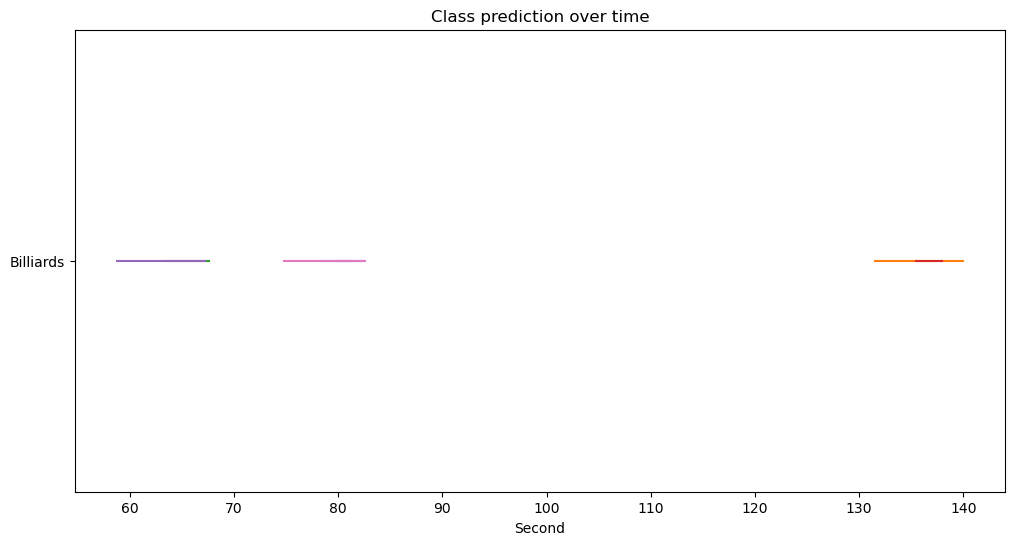

In [56]:
# Filter expected segments associated with a video
predicted_video = predictions_df[(predictions_df['video_id'] == "video_validation_0000051") & (predictions_df['score'] > 0.2)]

# Plot prediction for the video
plt.figure(figsize=(12, 6))
for _, row in predicted_video.iterrows():
  plt.plot([row['start'], row['end']], [row['label']] * 2)
plt.title('Class prediction over time')
plt.xlabel('Second')
plt.show()

### Ground truth

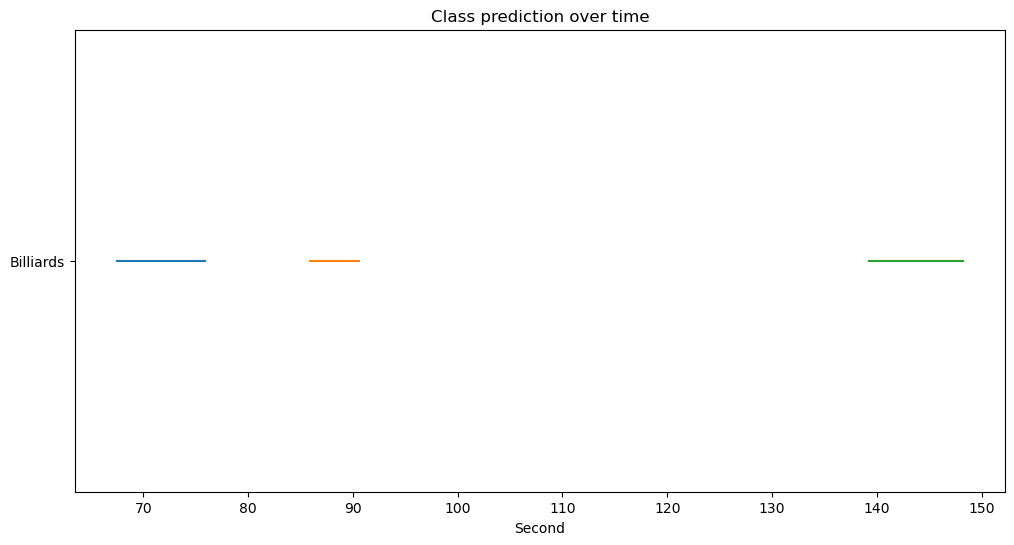

In [61]:
# Filter expected segments associated with a video
video = gt_df[gt_df['video_id'] == "video_validation_0000051"]

# Plot prediction for the video
plt.figure(figsize=(12, 6))
for _, row in video.iterrows():
  plt.plot([row['start'], row['end']], [row['label']] * 2)
plt.title('Class prediction over time')
plt.xlabel('Second')
plt.show()